# Module 9 : Réseaux de neuronnes

In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import numpy as np

## exemple 1

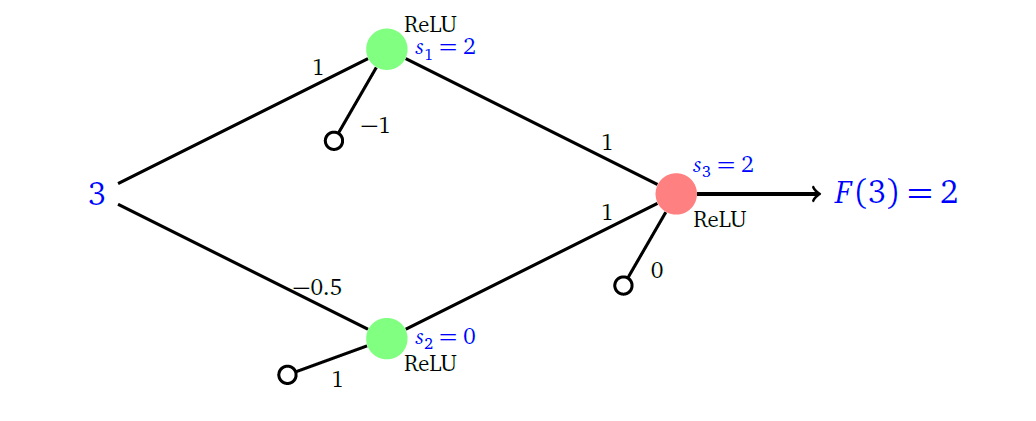

In [3]:
# Architecture du réseau
modele = Sequential()

# Couches de neurones
modele.add(Dense(2, input_dim=1, activation='relu'))
modele.add(Dense(1, activation='relu'))

d:\Talarian\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
modele.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Couche 0
coeff = np.array([[1.,-0.5]])
biais = np.array([-1,1])
poids = [coeff,biais]
modele.layers[0].set_weights(poids)

# Couche 1
coeff = np.array([[1.0],[1.0]])
biais = np.array([0])
poids = [coeff,biais]
modele.layers[1].set_weights(poids)

In [6]:
modele.layers[0].get_weights()

[array([[ 1. , -0.5]], dtype=float32), array([-1.,  1.], dtype=float32)]

In [7]:
entree = np.array([[3.0]])
sortie = modele.predict(entree)
entree, sortie

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


(array([[3.]]), array([[2.]], dtype=float32))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


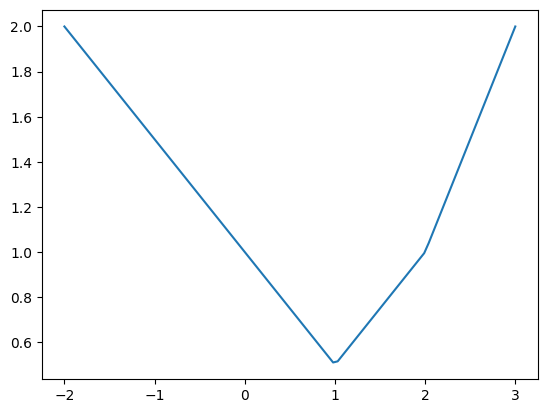

In [8]:
import matplotlib.pyplot as plt
liste_x = np.linspace(-2, 3, num=100)
entree = np.array([[x] for x in liste_x])
sortie = modele.predict(entree)
liste_y = np.array([y[0] for y in sortie])
plt.plot(liste_x,liste_y)
plt.show()

## Autre exemple

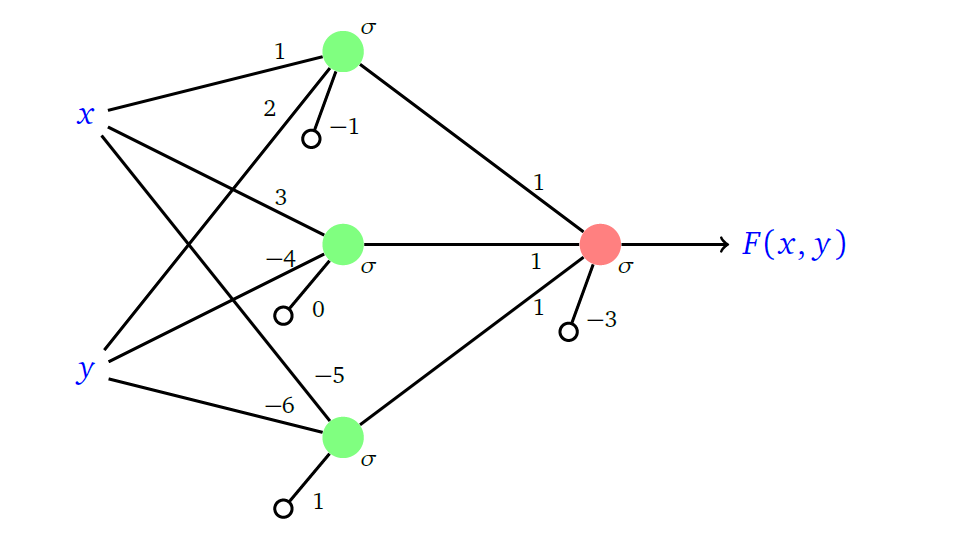

In [39]:
import tensorflow as tf

In [40]:
modele2 = Sequential()

modele2.add(Dense(3, input_dim=2, activation="sigmoid"))
modele2.add(Dense(1, activation=lambda x: 1/(1+tf.exp(-x))))

modele2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
modele2.get_weights()

[array([[ 1.0640347 ,  0.79140985, -0.9347915 ],
        [-0.16572249,  0.33166492, -0.9282224 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.06742382],
        [ 1.1010317 ],
        [-0.549359  ]], dtype=float32),
 array([0.], dtype=float32)]

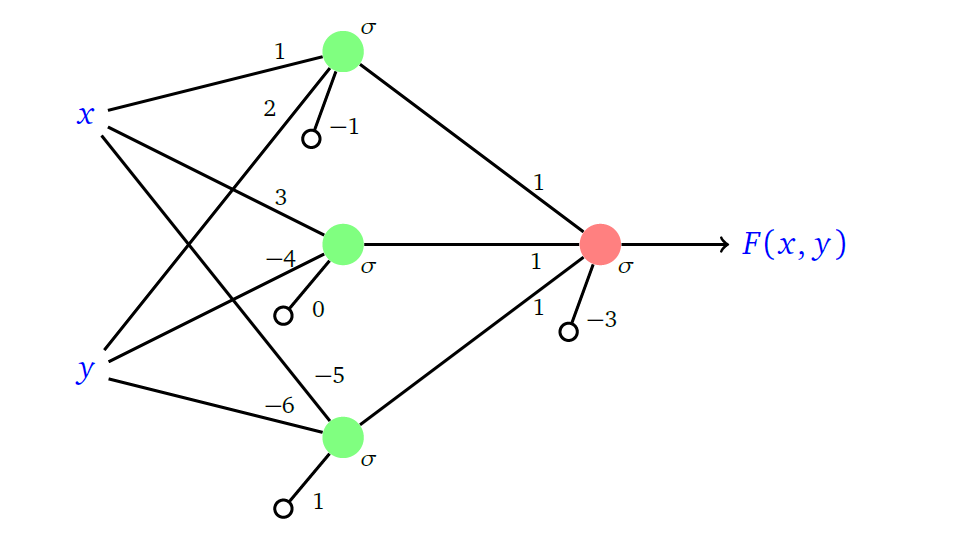

In [42]:
# Couche 0
coeff2 = np.array([[1., 3, -5], [2.,-4,-6]])
biais2 = np.array([-1,0,1])
poids2 = [coeff2,biais2]
modele2.layers[0].set_weights(poids2)

# Couche 1
coeff2 = np.array([[1.0],[1.0],[1.0]])
biais2 = np.array([-3])
poids2 = [coeff2,biais2]
modele2.layers[1].set_weights(poids2)

In [36]:
modele2.get_weights()

[array([[ 1.,  3., -5.],
        [ 2., -4., -6.]], dtype=float32),
 array([-1.,  0.,  1.], dtype=float32),
 array([[1.],
        [1.],
        [1.]], dtype=float32),
 array([-3.], dtype=float32)]

In [43]:
entree = np.array([[7,-5]])
sortie = modele2.predict(entree)
entree, sortie

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


(array([[ 7, -5]]), array([[0.12303182]], dtype=float32))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


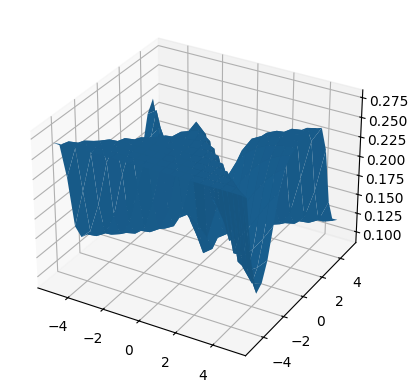

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
VX = np.linspace(-5, 5, 20)
VY = np.linspace(-5, 5, 20)
X,Y = np.meshgrid(VX, VY)
entree = np.c_[X.ravel(), Y.ravel()]
sortie = modele2.predict(entree)
Z = sortie.reshape(X.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

## SUite

In [53]:
modele = Sequential()
modele.add(Dense(1, input_dim=1, activation=lambda x: tf.where(x >= 0, 1.0, 0.0)))
modele.layers[0].set_weights([np.array([[-.5]]), np.array([1])])

In [54]:
modele.predict(np.array([[0.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[1.]], dtype=float32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


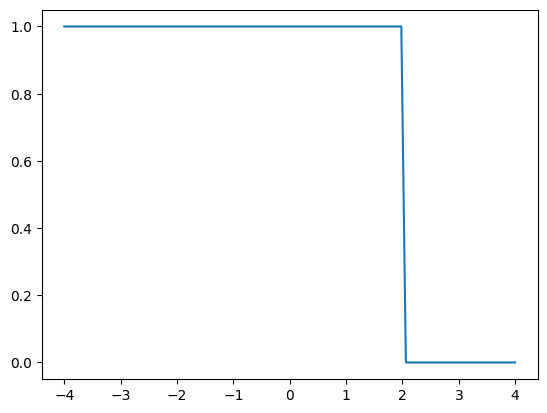

In [55]:
import matplotlib.pyplot as plt
liste_x = np.linspace(-4, 4, num=100)
entree = np.array([[x] for x in liste_x])
sortie = modele.predict(entree)
liste_y = np.array([y[0] for y in sortie])
plt.plot(liste_x,liste_y)
plt.show()

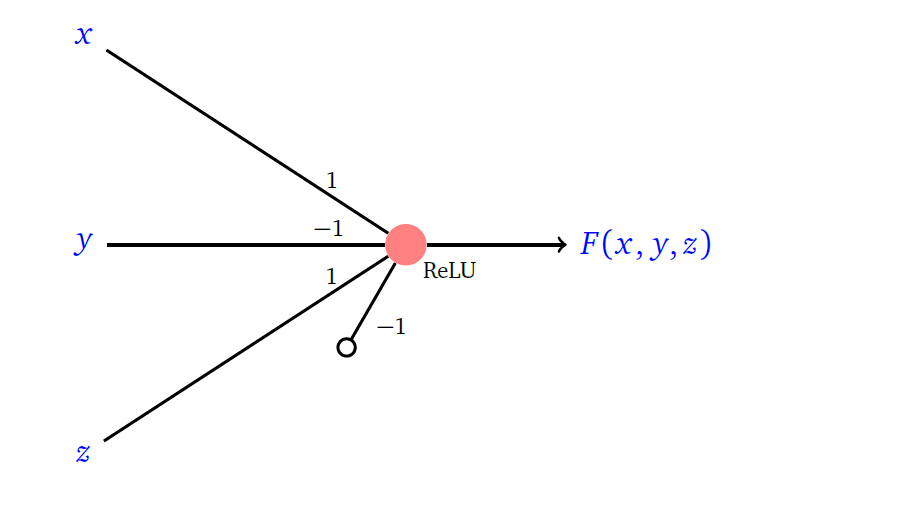

In [94]:
modele = Sequential()
modele.add(Dense(1, input_dim=3, activation="relu"))
modele.layers[0].set_weights([np.array([[1.], [-1.], [1.]]), np.array([-1.0])])

modele.predict(np.array([[2.0,3.0,4.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[2.]], dtype=float32)

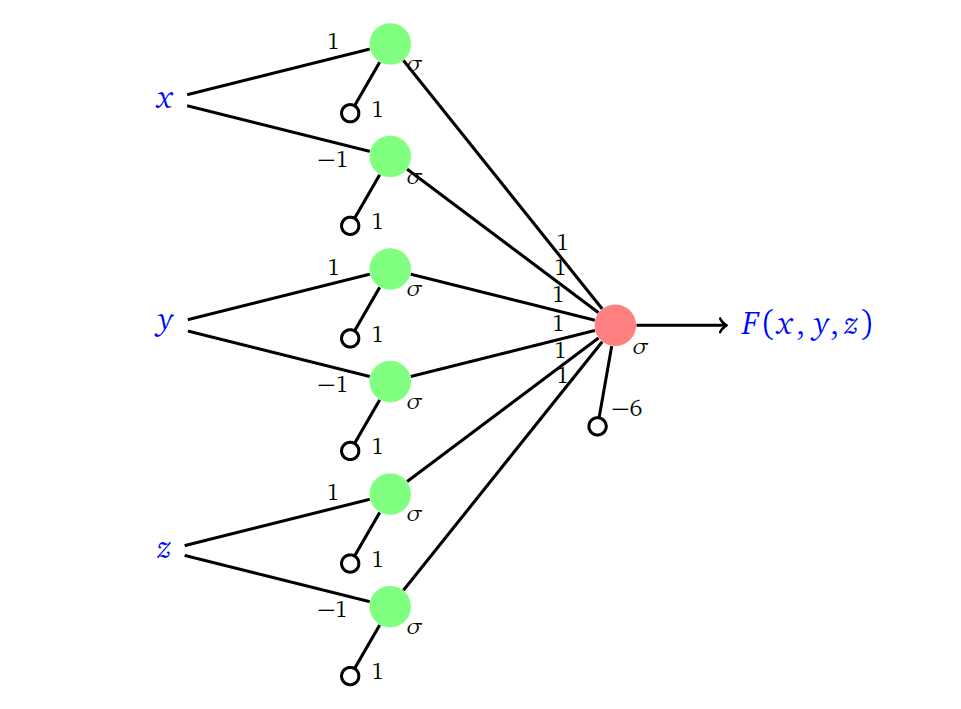

In [113]:
modele = Sequential()
modele.add(Dense(6, input_dim=3, activation=lambda x: tf.where(x >= 0, 1.0, 0.0)))
modele.add(Dense(1, activation=lambda x: tf.where(x >= 0, 1.0, 0.0)))

modele.layers[0].set_weights([
    np.array([
        [1., -1., 0., 0., 0., 0.],
        [0., 0., 1., -1., 0., 0.],
        [0., 0., 0., 0., 1., -1.]
    ]), 
    np.array([1., 1., 1., 1., 1., 1.])
])
modele.layers[1].set_weights([
    np.array([[1.], [1.], [1.], [1.], [1.], [1.]]), np.array([-6])
])
modele.get_weights()

d:\Talarian\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[array([[ 1., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., -1.]], dtype=float32),
 array([1., 1., 1., 1., 1., 1.], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([-6.], dtype=float32)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


C:\Users\kokou\AppData\Local\Temp\ipykernel_6332\577790141.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_values[i, j, k] = model.predict(np.array([[X[i, j, k], Y[i, j, k], Z[i, j, k]]]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

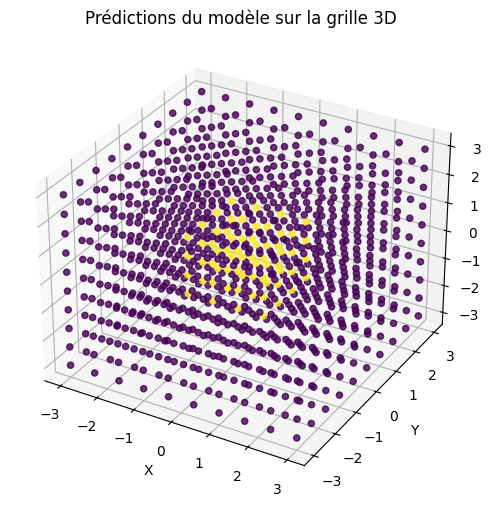

In [114]:
evaluate_model_on_grid(modele, resolution=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


C:\Users\kokou\AppData\Local\Temp\ipykernel_6332\577790141.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_values[i, j, k] = model.predict(np.array([[X[i, j, k], Y[i, j, k], Z[i, j, k]]]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

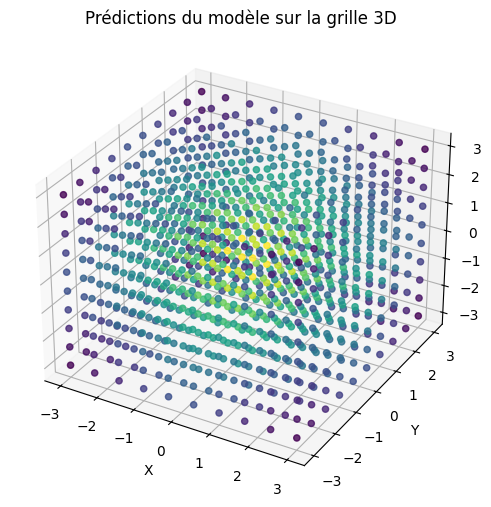

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def evaluate_model_on_grid(model, x_range=(-3, 3), y_range=(-3, 3), z_range=(-3, 3), resolution=10):
    """
    Évalue un modèle sur une grille 3D et affiche un nuage de points coloré.
    
    Paramètres :
        model : un objet possédant une méthode predict(x, y, z)
        x_range, y_range, z_range : tuples définissant les intervalles d'évaluation
        resolution : nombre de points par axe
    """
    # Création des listes x, y, z
    x_list = np.linspace(*x_range, resolution)
    y_list = np.linspace(*y_range, resolution)
    z_list = np.linspace(*z_range, resolution)

    # Création de la grille 3D
    X, Y, Z = np.meshgrid(x_list, y_list, z_list)
    
    # Initialisation de la liste des prédictions
    F_values = np.zeros_like(X, dtype=float)

    # Calcul des prédictions pour chaque (x, y, z)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            for k in range(X.shape[2]):
                F_values[i, j, k] = model.predict(np.array([[X[i, j, k], Y[i, j, k], Z[i, j, k]]]))

    # Création de la figure
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Affichage des points en 3D
    ax.scatter(X, Y, Z, c=F_values, cmap="viridis", alpha=0.8)

    # Labels et titre
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Prédictions du modèle sur la grille 3D")

    plt.show()

# # Exemple d'un modèle fictif
# class DummyModel:
#     def predict(self, x, y, z):
#         return np.sin(x) * np.cos(y) + z**2  # Exemple de fonction

# # Test de la fonction avec un modèle factice
# dummy_model = DummyModel()
evaluate_model_on_grid(modele, resolution=10)


## Approximation

In [65]:
f = lambda x: np.cos(2*x)+x*np.sin(3*x)+np.sqrt(x)
f(3)

np.float64(3.928576549944513)

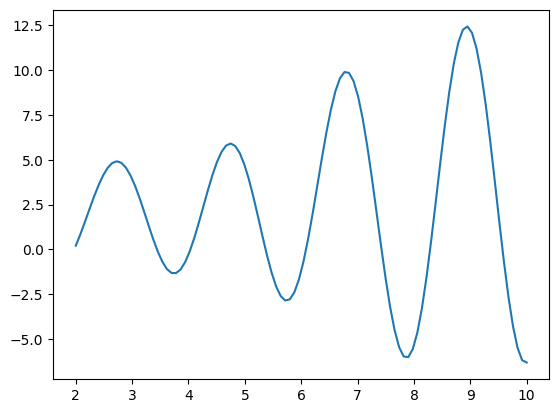

In [62]:
import matplotlib.pyplot as plt
liste_x = np.linspace(2, 10, num=100)
entree = np.array([[x] for x in liste_x])
sortie = f(entree)
liste_y = np.array([y[0] for y in sortie])
plt.plot(liste_x,liste_y)
plt.show()

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def approx_fonction_en_escalier(f, a, b, n, methode="gauche"):
    """
    Approxime une fonction continue f(x) sur [a, b] par une fonction en escalier avec n intervalles.
    
    Paramètres :
        f : function, la fonction à approximer
        a, b : float, bornes de l'intervalle
        n : int, nombre d'intervalles
        methode : str, "gauche", "droite" ou "milieu" pour choisir la valeur de référence par intervalle
    """
    x = np.linspace(a, b, 1000)  # Points pour tracer f(x)
    y = f(x)

    # Découpage de l'intervalle
    x_intervalles = np.linspace(a, b, n+1)  # n+1 points définissant n intervalles
    pas = (b - a) / n

    # Choix des hauteurs des rectangles
    if methode == "gauche":
        x_points = x_intervalles[:-1]  # Extrémité gauche
    elif methode == "droite":
        x_points = x_intervalles[1:]  # Extrémité droite
    elif methode == "milieu":
        x_points = (x_intervalles[:-1] + x_intervalles[1:]) / 2  # Milieu
    else:
        raise ValueError("Méthode non reconnue : choisir 'gauche', 'droite' ou 'milieu'")

    y_intervalles = f(x_points)  # Valeurs de la fonction en ces points

    # Tracé de la fonction originale
    plt.plot(x, y, 'b-', linewidth=1, label=r"$f(x)$")  

    # Tracé de l'approximation en escalier
    for i in range(n):
        plt.hlines(y_intervalles[i], x_intervalles[i], x_intervalles[i+1], color='red', linewidth=2)
        plt.vlines(x_intervalles[i+1], min(y_intervalles[i], 0), y_intervalles[i], color='pink', linewidth=1)

    # Labels et affichage
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.title(f"Approximation en escalier de f(x) avec {n} intervalles ({methode})")
    plt.grid(True)
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt

def approx_fonction_continue(f, a, b, n, methode="gauche"):
    """
    Approxime une fonction continue f(x) sur [a, b] par une fonction en escalier continue par morceaux.

    Paramètres :
        f : function, la fonction à approximer
        a, b : float, bornes de l'intervalle
        n : int, nombre d'intervalles
        methode : str, "gauche", "droite" ou "milieu" pour choisir la valeur de référence par intervalle
    """
    x = np.linspace(a, b, 1000)  # Points pour tracer f(x)
    y = f(x)

    # Découpage de l'intervalle
    x_intervalles = np.linspace(a, b, n+1)  # n+1 points définissant n intervalles
    pas = (b - a) / n

    # Choix des points d'échantillonnage
    if methode == "gauche":
        x_points = x_intervalles[:-1]  # Extrémité gauche
    elif methode == "droite":
        x_points = x_intervalles[1:]  # Extrémité droite
    elif methode == "milieu":
        x_points = (x_intervalles[:-1] + x_intervalles[1:]) / 2  # Milieu
    else:
        raise ValueError("Méthode non reconnue : choisir 'gauche', 'droite' ou 'milieu'")

    y_intervalles = f(x_points)  # Valeurs de la fonction en ces points

    # Construction des points pour une courbe continue par morceaux
    x_stairs = np.repeat(x_intervalles, 2)[1:-1]  # On répète les x sauf le premier et dernier en double
    y_stairs = np.repeat(y_intervalles, 2)  # Chaque y est répété 2 fois pour la continuité

    # Tracé de la fonction originale
    plt.plot(x, y, 'b-', linewidth=1, label=r"$f(x)$")  

    # Tracé de la fonction en escalier continue
    plt.plot(x_stairs, y_stairs, 'r-', linewidth=1, label="Approximation en escalier")

    # Labels et affichage
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.title(f"Approximation en escalier continue avec {n} intervalles ({methode})")
    plt.grid(True)
    plt.show()


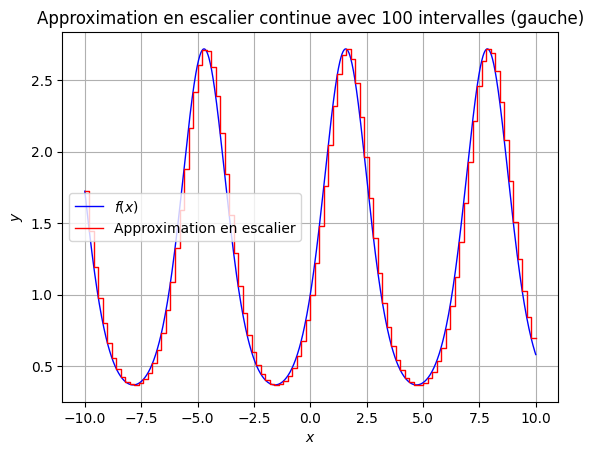

In [ ]:
approx_fonction_continue(f, a=-10, b=10, n=100, methode="gauche")